In [486]:
from matplotlib.pyplot import figure
import seaborn as sns
sns.set_theme(style="ticks", color_codes=True)

figure(figsize=(18, 12), dpi=600)

<Figure size 10800x7200 with 0 Axes>

<Figure size 10800x7200 with 0 Axes>

In [487]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import pearsonr, spearmanr

from sklearn import svm
from sklearn.preprocessing import StandardScaler, Normalizer
tf.__version__

'2.5.0'

In [488]:
# Load the dataframe that was saved in read_files.py

default = False

if default:
    df = pd.read_csv("tmp/df.csv", index_col=0)
    labels = ['mean Cd 200', 'mean Cd 400', 'mean Cd 600']
    q = df["mean Cd 200"].quantile(0.999)

else:
    df = pd.read_csv("tmp/training_data.csv",  sep="\t")
    labels = ['cd', 'cl']
     
    df = df[(df["cd"] < 1) & (df["cd"]>-0.5)]



In [549]:
df.describe()

,u,angle,cd,cl
count,1189.000000,1189.000000,1189.000000,1189.000000
mean,50.510934,7.429773,0.029741,0.637121
std,5.660414,4.464826,0.051227,0.377540
min,41.000000,0.000000,-0.218691,-0.432934
25%,45.500000,3.500000,0.009391,0.310711
50%,50.500000,7.500000,0.012202,0.662303
75%,55.500000,11.500000,0.024222,0.963150
max,60.000000,15.000000,0.704503,2.927380


In [490]:
ss = Normalizer()

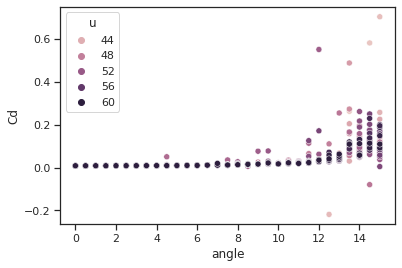

In [491]:
sns.color_palette("pastel")

# Exploration for outliers
sns.scatterplot(data=df,  x="angle", y= "cd", hue="u")
plt.ylabel("Cd")
#df.plot.scatter("angle","cl")
#df.plot.scatter("angle","cd")
plt.savefig("cd_vs_angle.png")



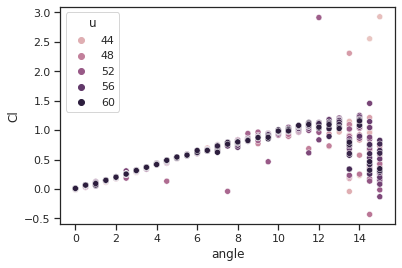

In [492]:
sns.scatterplot(data=df,  x="angle", y= "cl", hue="u")
plt.ylabel("Cl")
plt.savefig("cl_vs_angle.png")


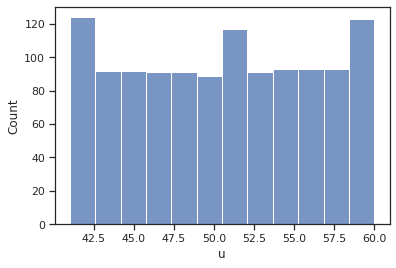

In [493]:
sns.histplot(data=df, x="u")
plt.savefig("u_hist.png")

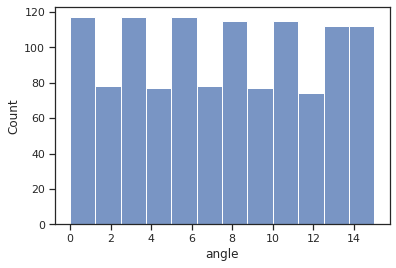

In [494]:
sns.histplot(data=df, x="angle")
plt.savefig("angle_hist.png")

In [495]:
df.describe()

,u,angle,cd,cl
count,1189.000000,1189.000000,1189.000000,1189.000000
mean,50.510934,7.429773,0.029741,0.637121
std,5.660414,4.464826,0.051227,0.377540
min,41.000000,0.000000,-0.218691,-0.432934
25%,45.500000,3.500000,0.009391,0.310711
50%,50.500000,7.500000,0.012202,0.662303
75%,55.500000,11.500000,0.024222,0.963150
max,60.000000,15.000000,0.704503,2.927380


<AxesSubplot:xlabel='cl', ylabel='cd'>

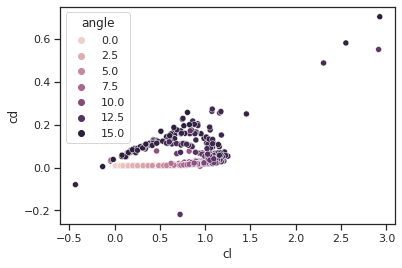

In [496]:
sns.scatterplot(data=df,  x="cl", y= "cd", hue="angle")


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='angle', ylabel='cl'>

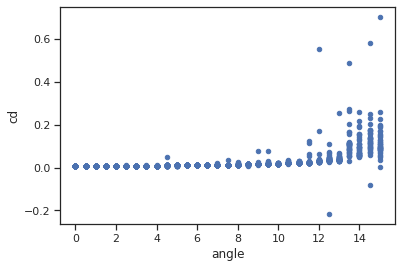

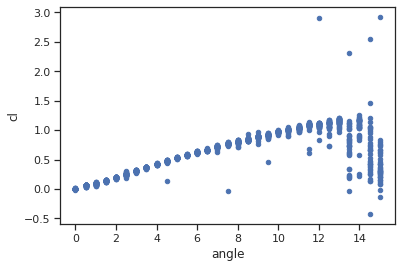

In [497]:
df.plot.scatter("angle","cd")
df.plot.scatter("angle","cl")

In [498]:
train, test = train_test_split(df, test_size=0.2)
train_features = train.copy()
test_features = test.copy()

In [499]:
# Remove the "mean Cd" column from the features and use it as label
train_labels = pd.concat([train_features.pop(x) for x in labels ], axis=1)
#train_labels = train_features.pop('mean Cd')
test_labels = pd.concat([test_features.pop(x) for x in labels], axis=1)
train.shape, test.shape

((951, 4), (238, 4))

In [500]:
for features in [train_features, test_features]:
    for column in ["u", "angle"]:
        features[column] /= features[column].max() 

print(train_features.describe())
print(test_features.describe())

                u       angle
count  951.000000  951.000000
mean     0.843384    0.505328
std      0.094488    0.298216
min      0.683333    0.000000
25%      0.758333    0.233333
50%      0.850000    0.500000
75%      0.925000    0.766667
max      1.000000    1.000000
                u       angle
count  238.000000  238.000000
mean     0.835714    0.455322
std      0.093696    0.292614
min      0.683333    0.000000
25%      0.752083    0.200000
50%      0.833333    0.466667
75%      0.914583    0.700000
max      1.000000    1.000000


In [501]:
n_layers = 6
n_nodes = 32

In [502]:
all_layers = [layers.Dense(n_nodes, activation="relu", name="hidden_layer_"+str(i)) for i in np.arange(n_layers)]
all_layers.append(layers.Dense(10, activation="softmax"))

all_layers.append(layers.Dense(2, name="output_layer"))
model = Sequential(all_layers)


In [503]:
model.compile(optimizer="rmsprop", loss='mean_squared_error')


In [504]:
history = model.fit(
    train_features, train_labels,
    epochs=400,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

Epoch 1/400
24/24 [==============================] - 1s 6ms/step - loss: 0.2198 - val_loss: 0.0793
Epoch 2/400
24/24 [==============================] - 0s 2ms/step - loss: 0.0763 - val_loss: 0.0638
Epoch 3/400
24/24 [==============================] - 0s 2ms/step - loss: 0.0608 - val_loss: 0.0507
Epoch 4/400
24/24 [==============================] - 0s 2ms/step - loss: 0.0470 - val_loss: 0.0397
Epoch 5/400
24/24 [==============================] - 0s 2ms/step - loss: 0.0370 - val_loss: 0.0332
Epoch 6/400
24/24 [==============================] - 0s 2ms/step - loss: 0.0314 - val_loss: 0.0291
Epoch 7/400
24/24 [==============================] - 0s 2ms/step - loss: 0.0280 - val_loss: 0.0270
Epoch 8/400
24/24 [==============================] - 0s 2ms/step - loss: 0.0263 - val_loss: 0.0265
Epoch 9/400
24/24 [==============================] - 0s 2ms/step - loss: 0.0257 - val_loss: 0.0264
Epoch 10/400
24/24 [==============================] - 0s 2ms/step - loss: 0.0254 - val_loss: 0.0263
Epoch 11/

24/24 [==============================] - 0s 2ms/step - loss: 0.0247 - val_loss: 0.0263
Epoch 84/400
24/24 [==============================] - 0s 2ms/step - loss: 0.0246 - val_loss: 0.0261
Epoch 85/400
24/24 [==============================] - 0s 2ms/step - loss: 0.0246 - val_loss: 0.0261
Epoch 86/400
24/24 [==============================] - 0s 2ms/step - loss: 0.0246 - val_loss: 0.0261
Epoch 87/400
24/24 [==============================] - 0s 2ms/step - loss: 0.0246 - val_loss: 0.0268
Epoch 88/400
24/24 [==============================] - 0s 2ms/step - loss: 0.0247 - val_loss: 0.0262
Epoch 89/400
24/24 [==============================] - 0s 2ms/step - loss: 0.0246 - val_loss: 0.0266
Epoch 90/400
24/24 [==============================] - 0s 2ms/step - loss: 0.0247 - val_loss: 0.0262
Epoch 91/400
24/24 [==============================] - 0s 2ms/step - loss: 0.0246 - val_loss: 0.0261
Epoch 92/400
24/24 [==============================] - 0s 2ms/step - loss: 0.0246 - val_loss: 0.0261
Epoch 93/400


24/24 [==============================] - 0s 2ms/step - loss: 0.0245 - val_loss: 0.0260
Epoch 165/400
24/24 [==============================] - 0s 2ms/step - loss: 0.0245 - val_loss: 0.0261
Epoch 166/400
24/24 [==============================] - 0s 2ms/step - loss: 0.0245 - val_loss: 0.0260
Epoch 167/400
24/24 [==============================] - 0s 2ms/step - loss: 0.0245 - val_loss: 0.0275
Epoch 168/400
24/24 [==============================] - 0s 2ms/step - loss: 0.0245 - val_loss: 0.0260
Epoch 169/400
24/24 [==============================] - 0s 2ms/step - loss: 0.0246 - val_loss: 0.0261
Epoch 170/400
24/24 [==============================] - 0s 2ms/step - loss: 0.0245 - val_loss: 0.0263
Epoch 171/400
24/24 [==============================] - 0s 2ms/step - loss: 0.0245 - val_loss: 0.0261
Epoch 172/400
24/24 [==============================] - 0s 2ms/step - loss: 0.0245 - val_loss: 0.0260
Epoch 173/400
24/24 [==============================] - 0s 2ms/step - loss: 0.0245 - val_loss: 0.0260
Epoc

24/24 [==============================] - 0s 2ms/step - loss: 0.0245 - val_loss: 0.0260
Epoch 246/400
24/24 [==============================] - 0s 2ms/step - loss: 0.0245 - val_loss: 0.0260
Epoch 247/400
24/24 [==============================] - 0s 2ms/step - loss: 0.0245 - val_loss: 0.0261
Epoch 248/400
24/24 [==============================] - 0s 2ms/step - loss: 0.0245 - val_loss: 0.0260
Epoch 249/400
24/24 [==============================] - 0s 2ms/step - loss: 0.0245 - val_loss: 0.0260
Epoch 250/400
24/24 [==============================] - 0s 2ms/step - loss: 0.0245 - val_loss: 0.0260
Epoch 251/400
24/24 [==============================] - 0s 2ms/step - loss: 0.0245 - val_loss: 0.0262
Epoch 252/400
24/24 [==============================] - 0s 2ms/step - loss: 0.0244 - val_loss: 0.0260
Epoch 253/400
24/24 [==============================] - 0s 2ms/step - loss: 0.0245 - val_loss: 0.0260
Epoch 254/400
24/24 [==============================] - 0s 2ms/step - loss: 0.0244 - val_loss: 0.0260
Epoc

24/24 [==============================] - 0s 2ms/step - loss: 0.0244 - val_loss: 0.0260
Epoch 327/400
24/24 [==============================] - 0s 2ms/step - loss: 0.0244 - val_loss: 0.0260
Epoch 328/400
24/24 [==============================] - 0s 2ms/step - loss: 0.0244 - val_loss: 0.0260
Epoch 329/400
24/24 [==============================] - 0s 2ms/step - loss: 0.0245 - val_loss: 0.0260
Epoch 330/400
24/24 [==============================] - 0s 2ms/step - loss: 0.0244 - val_loss: 0.0260
Epoch 331/400
24/24 [==============================] - 0s 2ms/step - loss: 0.0244 - val_loss: 0.0260
Epoch 332/400
24/24 [==============================] - 0s 2ms/step - loss: 0.0244 - val_loss: 0.0260
Epoch 333/400
24/24 [==============================] - 0s 2ms/step - loss: 0.0244 - val_loss: 0.0261
Epoch 334/400
24/24 [==============================] - 0s 2ms/step - loss: 0.0244 - val_loss: 0.0260
Epoch 335/400
24/24 [==============================] - 0s 2ms/step - loss: 0.0244 - val_loss: 0.0261
Epoc

===============================Test===============================
8/8 [==============================] - 0s 1ms/step - loss: 0.0088


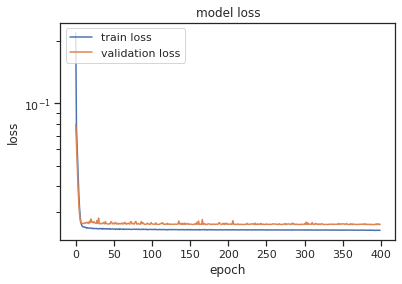

In [505]:
print("==================================================================")
print("===============================Test===============================")
eval_loss = model.evaluate(test_features,test_labels)

# Plot history of train and validation loss
plt.figure()
plt.semilogy(history.history['loss'])
plt.semilogy(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper left')
plt.savefig("model_loss_"+str(n_nodes)+"_nodes_"+str(n_layers)+"_layer.png")


In [506]:
model.save('tmp/model')


INFO:tensorflow:Assets written to: tmp/model/assets


In [507]:
predicted = model.predict(test_features)

In [508]:
predicted[:,0].shape, test_labels["cd"].shape

((238,), (238,))

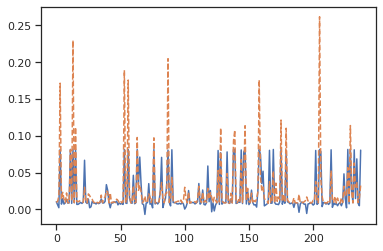

In [509]:
plt.plot(predicted[:,0])
plt.plot(test_labels["cd"].values, "--")
plt.savefig("cd.png")

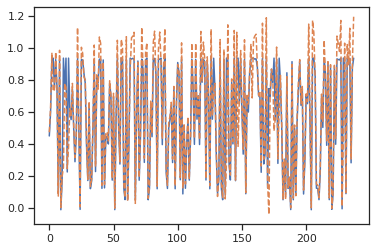

In [510]:
plt.plot(predicted[:,1])
plt.plot(test_labels["cl"].values, "--")
plt.savefig("cl.png")

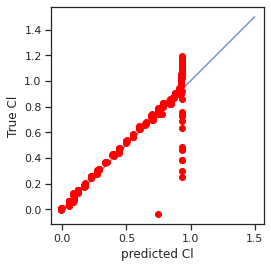

In [511]:
fig, ax = plt.subplots()

ax.scatter(predicted[:,1], test_labels["cl"].values, c="red" )
ax.set_xlabel("predicted Cl")
ax.set_ylabel("True Cl")
 
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot((0,1.5), (0, 1.5), alpha=0.75, zorder=0)
ax.set_aspect('equal')


(-0.01126924753189087, 0.27445905887654)

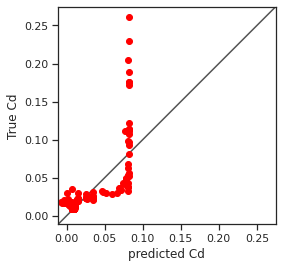

In [512]:
fig, ax = plt.subplots()

ax.scatter(predicted[:,0], test_labels["cd"].values, c="red" )
ax.set_xlabel("predicted Cd")
ax.set_ylabel("True Cd")
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
#plt.plot([0, 0.014])

In [513]:
model.evaluate(test_features, test_labels)

8/8 [==============================] - 0s 992us/step - loss: 0.0088


0.008827965706586838

In [514]:
model.predict(x=[[51.4815, 0]])

array([[0.07525812, 0.9361043 ]], dtype=float32)

In [515]:
model.predict(x=[[51.4815, 5]])

array([[0.08151502, 0.9371561 ]], dtype=float32)

In [516]:
model.predict(x=[[51.4815, 10]])

array([[0.08151502, 0.9371561 ]], dtype=float32)

In [517]:
model.predict(x=[[51.4815, 15]])

array([[0.08151502, 0.9371561 ]], dtype=float32)

In [518]:
nasa=pd.read_csv("nasa.dat", sep="\s+", names=["angle","cl","cd"])

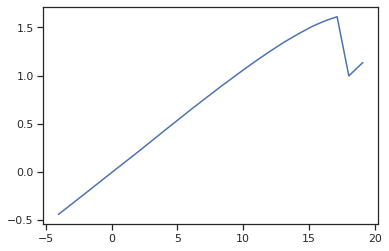

In [519]:
plt.plot(nasa["angle"], nasa["cl"])

In [520]:
nasa["u"] = 51.4815
nasa.head()

,angle,cl,cd,u
0,-4.04,-0.4417,0.00871,51.4815
1,-2.14,-0.2385,0.00800,51.4815
2,-0.05,-0.0126,0.00809,51.4815
3,2.05,0.2125,0.00816,51.4815
4,4.04,0.4316,0.00823,51.4815


In [521]:
nasa_test_features = nasa[["u", "angle"]]

In [522]:
nasa_predict = model.predict(nasa_test_features)

In [523]:
nasa_predict.shape

(17, 2)

In [524]:
nasa.shape

(17, 4)

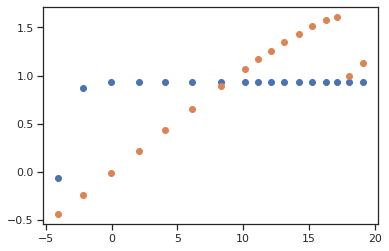

In [525]:
plt.scatter(nasa["angle"], nasa_predict[:,1])
plt.scatter(nasa["angle"], nasa["cl"])

(0.0, 0.08)

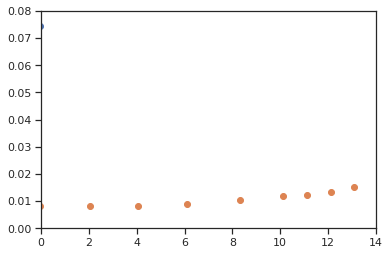

In [526]:
plt.scatter(nasa["angle"], nasa_predict[:,0])
plt.scatter(nasa["angle"], nasa["cd"])
plt.xlim(0,14)
plt.ylim(0,0.08)

In [527]:
tips = sns.load_dataset("tips")


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

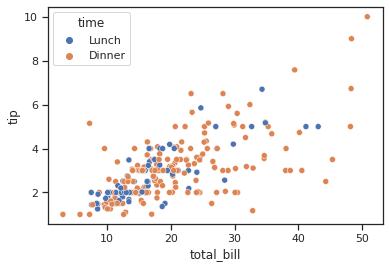

In [528]:
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="time")


In [529]:
pearsonr(df.u, df.cl)

(-0.01691715977477142, 0.5600524495403806)

In [530]:
pearsonr(df.cd, df.angle), pearsonr(df.cl, df.angle)

((0.5288590998079238, 1.1952005957218042e-86),
 (0.7567027861850539, 2.4336089372461764e-221))

In [531]:
spearmanr(df.u, df.cl), spearmanr(df.angle, df.cl)

(SpearmanrResult(correlation=-0.0060553100775509235, pvalue=0.8347755264160439),
 SpearmanrResult(correlation=0.7847117937380877, pvalue=8.372612677257458e-249))

In [532]:
spearmanr(df.u, df.cd), spearmanr(df.angle, df.cd)

(SpearmanrResult(correlation=-0.03522951801888536, pvalue=0.2247939055351063),
 SpearmanrResult(correlation=0.9668150771270123, pvalue=0.0))

In [533]:
svr = svm.SVR(gamma="scale", C=1.0, epsilon=0.1)

In [534]:
svr.fit(train_features, train_labels["cl"])

SVR()

In [535]:
svm_predict = svr.predict(test_features)

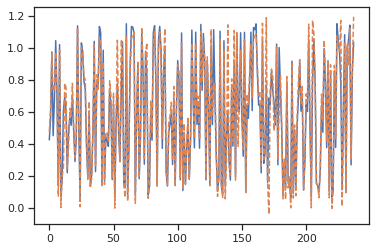

In [536]:
plt.plot(svm_predict)
plt.plot(test_labels["cl"].values, "--")
plt.savefig("svr_cl.png")

In [537]:
svr.score(test_features, test_labels["cl"])

0.9071924102168055

In [538]:
test_features.shape, test_labels.shape

((238, 2), (238, 2))

In [539]:
test_features, test_labels["cl"]

(            u     angle
 939  0.933333  0.300000
 601  0.841667  0.400000
 51   0.691667  0.666667
 495  0.808333  1.000000
 77   0.700000  0.500000
 ..        ...       ...
 486  0.808333  0.700000
 25   0.683333  0.833333
 719  0.875000  0.200000
 638  0.850000  0.600000
 646  0.850000  0.866667
 
 [238 rows x 2 columns],
 939    0.473551
 601    0.629037
 51     0.970676
 495    0.729063
 77     0.740163
          ...   
 486    0.895873
 25     1.124333
 719    0.305876
 638    0.903062
 646    1.196104
 Name: cl, Length: 238, dtype: float64)

In [540]:
result= [test_features, test_labels,]

In [541]:
result = test_features.join(test_labels)

In [542]:
svm_df  =pd.DataFrame(svm_predict, columns=["predicted"])

In [543]:
result = result.reset_index()

In [544]:
result= result.join(svm_df)

In [545]:
result.columns

Index(['index', 'u', 'angle', 'cd', 'cl', 'predicted'], dtype='object')

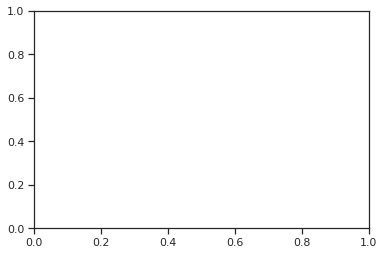

In [546]:
for u in [50, 52]:
    sns.lineplot(data=result[result.u==u],x="angle",y="cl", hue="u")
    sns.lineplot(data=result[result.u==u],x="angle",y="predicted", hue="u", linestyle="--" )


<AxesSubplot:xlabel='angle'>

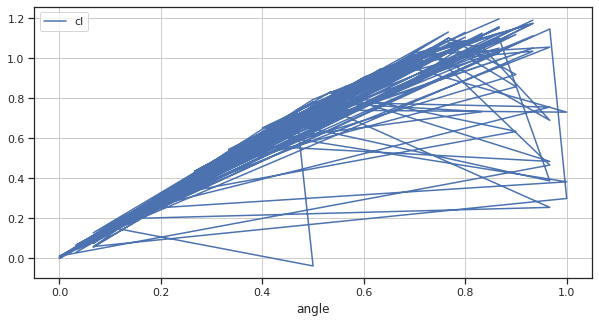

In [547]:
result.set_index('u').plot(x="angle", y="cl", figsize=(10,5), grid=True)


<AxesSubplot:>

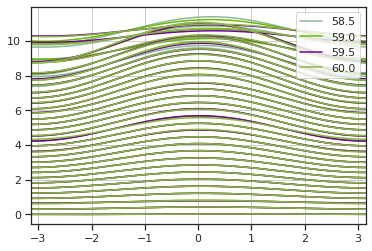

In [548]:
pd.plotting.andrews_curves(df[df.u>58], 'u')

array([[<AxesSubplot:xlabel='u', ylabel='u'>,
        <AxesSubplot:xlabel='angle', ylabel='u'>,
        <AxesSubplot:xlabel='cd', ylabel='u'>,
        <AxesSubplot:xlabel='cl', ylabel='u'>],
       [<AxesSubplot:xlabel='u', ylabel='angle'>,
        <AxesSubplot:xlabel='angle', ylabel='angle'>,
        <AxesSubplot:xlabel='cd', ylabel='angle'>,
        <AxesSubplot:xlabel='cl', ylabel='angle'>],
       [<AxesSubplot:xlabel='u', ylabel='cd'>,
        <AxesSubplot:xlabel='angle', ylabel='cd'>,
        <AxesSubplot:xlabel='cd', ylabel='cd'>,
        <AxesSubplot:xlabel='cl', ylabel='cd'>],
       [<AxesSubplot:xlabel='u', ylabel='cl'>,
        <AxesSubplot:xlabel='angle', ylabel='cl'>,
        <AxesSubplot:xlabel='cd', ylabel='cl'>,
        <AxesSubplot:xlabel='cl', ylabel='cl'>]], dtype=object)

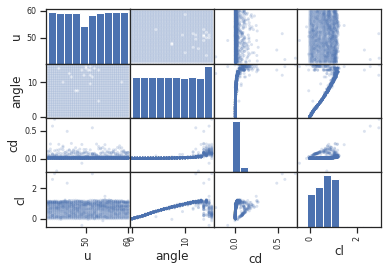

In [443]:
pd.plotting.scatter_matrix(df, alpha=0.2)